In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy.abc import x, y, _clash1
from sympy.plotting import plot
from sympy import *
import pandas as pd
from numpy.linalg import solve
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
def jacobi(A,b,n):
  x = len(A) * [0]
  D = np.diag(A)
  R = A-np.diagflat(D)
  for i in range(n):
    x = (b-np.dot(R,x))/D
  return x

In [ ]:
def jac(f,x,dx = 1e-10):
    x = np.array(x)
    n = len(x)
    J = np.zeros((n,n))
    for j in range(n):
        xn = np.copy(x)
        xn[j] = xn[j] + dx
        dy = np.array(f(xn)) - np.array(f(x))
        dif = dy/dx
        for i in range(n):
            J[i,j] = dif[i]
    return J

def newton_raph(func,x0,tol = 1e-10, iter = False, n_tot = 500):
  tol = abs(tol) 
  n_tot = abs(n_tot)
  x = (np.array(x0)).astype(float)
  e = max(abs(np.array(func(x))))
  n = 0    
  while (e > tol and n <= n_tot):
    n += 1
    F = np.array(func(x))
    e = max(abs(F))
    J = jac(func,x)
    if len(F) == 1:
      x = x - F/J
    else:
      S = np.linalg.solve(J, -F)
      x = x + S
  if iter == True:
    print('Iterações: ' + str(n))
  if n >= n_tot:
    print("Processo parou, número de iterações limite atingido")
  else:
    return x

def f(p):
    x1,x2 = p
    return np.array((x1+x2-3, (x1**2)+(x2**2)-9))

x0 = [1,5]
x = newton_raph(f,x0,tol = 0.0001, iter=True)
print('x: ',x)

Iterações: 5
x:  [-5.30622593e-12  3.00000000e+00]


In [ ]:
class InterNewton:
    def __init__(self):
        self.mat=[]
        self.coeficientes=[]
    
    def fit(self, x, y):
        n = len(x)
        self.mat.append(y)

        for j in range(1, n):
            self.mat.append([])
            #print(self.mat)
            for i in range(n-j):
                #print(i)
                self.mat[j].append((self.mat[j-1][i+1] - self.mat[j-1][i]) / (x[i+j] - x[i]))

        for e in self.mat: self.coeficientes.append(e[0])

        #print(self.mat)
    
    def newton_calc(self, x_eixo, y_eixo, A=None):
      #A => ponto ou pontos
      #x => eixo x
      #self.mat => coeficientes de newton
      if isinstance(A, int) or isinstance(A, float):
        y = self.coeficientes[0]

        for i in range(1,len(self.coeficientes)):
          produto = self.coeficientes[i]
          for j in range(0, i):
            produto *= (A - x_eixo[j])
          y += produto

        return y

    def newton(self, x_eixo, y_eixo, A=None):
      if isinstance(A, int) or isinstance(A, float):
        return self.newton_calc(x_eixo, y_eixo, A)
      
      S = []
      for value in x:
        S.append(self.newton_calc(x, y, value))
      return S


    def showPolynomial(self, x_eixo, y_eixo):
      around_coeficientes = np.around(self.coeficientes,3)
      factors = []
      for i in range(len(x_eixo) - 1):
        factors.append('(x - {})'.format(x[i]))
      #print(x)
      #print('factors', factors)

      newFactors = []
      for i in range(len(factors)):
        newFactors.append(factors[:i + 1])
      #print('newFactors', newFactors)

      newFactConc = ['*'.join(sub_list) for sub_list in newFactors]

      finalFactors = []
      for i in range(1, len(x_eixo)):
        finalFactors.append('{}*{}'.format(newFactConc[i - 1], around_coeficientes[i]))
      #print('finalFactors', finalFactors)

      parseResult = "{}+".format(y_eixo[0]) + '+'.join(finalFactors)
      #print('parseResult', parseResult)
      result = sympify(parseResult, locals=_clash1)
      #print('result:', result)
      pnx = "{}".format(expand(result))
      print('pn(x): ', pnx)
      return pnx
      

#inter = InterNewton()
#inter.fit([-1,0,1,2,3], [1,1,0,-1,-2])
'''x = [-2,1,2]
y = [11,2,3]'''
'''x = [3,4,5,6,7,8,9,10]
y = [4,3,5,7,5,8,10,10.5]'''

def valoresXY(I, f, pontos=1):
  X = np.around(np.linspace(I[0], I[1], pontos), 8)
  Y = []

  for value in X: Y.append(f(value))
  return(X,Y)

In [ ]:
def lagrange_calc(x, y, p=None):
  S = 0
  for i in range(len(x)):
    L = 1
    for j in range(len(x)):
      if(i != j):
        L *= ((p - x[j]) / (x[i] - x[j]))
    S += y[i] * L

  return S

def lagrange(x, y, p=None):
  if isinstance(p, int) or isinstance(p, float):
    return lagrange_calc(x, y, p)

  S = []
  for value in x:
    S.append(lagrange_calc(x, y, value))
  return S

Coordenadas (Duplo <enter> finaliza o input)
x y
-2 11
1 2
2 3

Índice: (De 1 a 2): 2
xk = -2
Para xk = -2.0 => p(-2.0) = 11.0000000000000
p(x) = 1.0*x**2 - 2.0*x + 3.0


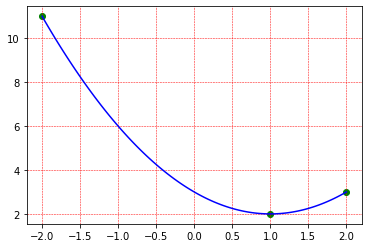

Feche a aba da plotagem para encerrar o programa.


In [ ]:
from sympy.abc import x, y, _clash1
from sympy.plotting import plot
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

coord = []

print('Coordenadas (Duplo <enter> finaliza o input)')
print('x y')
i = input()
while i != '':
    coord.append([float(s) for s in i.split()])
    i = input()

index = int(input("Índice: (De 1 a {}): ".format(len(coord) - 1)))
xk = float(input("xk = "))

deltas = [[] for _ in range(len(coord) - 1)]

for i in range(len(coord) - 1):
  deltas[0].append(round((coord[i + 1][1] - coord[i][1])/(coord[i + 1][0] - coord[i][0]), 3))

for k in range(len(deltas) - 1):
  for i in range(len(deltas[k]) - 1):
    deltas[k + 1].append(round((deltas[k][i + 1] - deltas[k][i])/(coord[i + 2 + k][0] - coord[i][0]), 3))

#print(deltas)
firstItem = [item[0] for item in deltas]
firstItem.insert(0, coord[0][1])
#print('firstItem', firstItem)

factors = []

for i in range(len(coord) - 1):
  factors.append('(x - {})'.format(coord[i][0]))
#print('factors', factors)
newFactors = []

for i in range(len(factors)):
  newFactors.append(factors[:i + 1])

newFactConc = ['*'.join(sub_list) for sub_list in newFactors]
#print('newFactors', newFactors)

finalFactors = []

for i in range(1, index + 1):
  finalFactors.append('{}*{}'.format(newFactConc[i - 1], firstItem[i]))
#print('finalFactors', finalFactors)
#print('coord[0][1]: ',coord[0][1])
parseResult = "{}+".format(coord[0][1]) + '+'.join(finalFactors)
#print('parseResult', parseResult)

#print('parseResult:', parseResult)
result = sympify(parseResult, locals=_clash1)
#print('result:', result)

print("Para xk = {} => p({}) = {}".format(xk, xk, round(result.subs(x, xk), 3)))
print("p(x) = {}".format(expand(result)))

x_coord = [] 
y_coord = []

for i in range(len(coord)):
  x_coord.append(coord[i][0])

for i in range(len(coord)):
  y_coord.append(coord[i][1])

interval = np.linspace(coord[0][0], coord[-1][0], num=100)
fx = []
for i in range(len(interval)):
  fx.append(result.subs(x, interval[i]))

plt.plot(interval, fx, color='b')
plt.grid(True, linewidth=.5, linestyle='--', color='r')
plt.scatter(x_coord, y_coord, color='g')
plt.show()
print("Feche a aba da plotagem para encerrar o programa.")

In [ ]:
class MQ:
  def __init__(self):
    self.alfas = []

  def fit_exp(self, x, y):
    self.alfas=[]
    lnY = np.log(y)
    self.fit(x, lnY, [lambda x:1, lambda x:x])
    self.alfas[0] = math.e**self.alfas[0]
    self.alfas[1] =- self.alfas[1]

  def fit(self,x,y,G):
    self.G=G
    A=[]
    B=[]
    j=0
    for g_lin in G:
      b=0
      for i in range(0,len(x)):
        b+=g_lin(x[i])*y[i]
      B.append(b)
      A.append([])
      for g_col in G:
        a=0
        for i in range(0,len(x)):
          a+=g_lin(x[i])*g_col(x[i])
        A[j].append(a)
      j+=1

    mat = np.append(A, np.array([B]).T,axis=1)
    #print('A: ', A)
    #print(mat)
    #print('B: ', B)
    #print('mat: ', mat)
    self.alfas = solve(A, B)
    print(f"Alfas: {self.alfas}")

  def calc(self, x):
    s = 0
    #print(self.alfas)
    for i in range(0,len(self.G)):
      s+=self.alfas[i]*self.G[i](x)
    return s
  
  def calc_exp(self, x):
    return self.alfas[0]*(math.e**(-self.alfas[1]*x))

'''mq = MQ()
#Exemplo 1 - Linear
X = [3,4,5,6,7,8,9,10]
Y = [4,3,5,7,5,8,10,10.5]
mq.fit(X,Y,[lambda x:x, lambda x:1])
print(mq.calc(15))
plt.scatter(X,Y)
#plt.plot(x_line, y_line, color="red")
#plt.plot(x_line2, y_line2, color="green")
#plt.show()

x_line = np.linspace(0, 15, 50)
print(x_line)
y_line = list(map(lambda x: mq.calc(x), x_line))
plt.scatter(X,Y)
plt.plot(x_line, y_line, color="red")
#plt.plot(x_line2, y_line2, color="green")
plt.show()
print(y_line)

#Exemplo 2 - Não Linear
X = [-1, -0.7, -0.4, -0.1, 0.2, 0.5, 0.8, 1]
Y = [36.457, 17.264, 8.155, 3.852, 1.820, 0.860, 0.406, 0.246]
mq.fit(X, Y, [lambda x:math.e**-x, lambda x:1])

x_line = np.linspace(-2, 2, 50)
y_line = list(map(lambda x: mq.calc(x), x_line))
plt.scatter(X,Y)
plt.plot(x_line, y_line, color="red")
#plt.plot(x_line2, y_line2, color="green")
plt.show()

#Exemplo 3 - aaaa
X = [-1, -0.7, -0.4, -0.1, 0.2, 0.5, 0.8, 1]
Y = [36.457, 17.264, 8.155, 3.852, 1.820, 0.860, 0.406, 0.246]
mq.fit(X, Y, [lambda x:1, lambda x:x])

x_line = np.linspace(-2, 2, 50)
y_line = list(map(lambda x: mq.calc(x), x_line))
plt.scatter(X,Y)
plt.plot(x_line, y_line, color="red")
#plt.plot(x_line2, y_line2, color="green")
plt.show()

#Exemplo 4 
X = [-1, -0.7, -0.4, -0.1, 0.2, 0.5, 0.8, 1]
Y = [36.457, 17.264, 8.155, 3.852, 1.820, 0.860, 0.406, 0.246]
mq.fit_exp(X, Y)
x_line = np.linspace(-2, 2, 50)
y_line = list(map(lambda x: mq.calc_exp(x), x_line))
plt.scatter(X,Y)
plt.plot(x_line, y_line, color="red")
#plt.plot(x_line2, y_line2, color="green")
plt.show()

#Exemplot 5
X = [-1, -0.7, -0.4, -0.1, 0.2, 0.5, 0.8, 1]
Y = [36.547, 17.264, 8.155, 3.852, 1.820, 0.860, 0.406, 0.246]
mq.fit_exp(X, Y)
x_line = np.linspace(-1.5, 2, 50)
y_line = list(map(lambda x: mq.calc_exp(x), x_line))

mq.fit(X, Y, [lambda x:math.e**-x, lambda x:x, lambda x: 1])
x_line2 = np.linspace(-1.5, 2, 50)
y_line2 = list(map(lambda x: mq.calc(x), x_line2))


plt.scatter(X,Y)
plt.plot(x_line, y_line, color="red")
plt.plot(x_line2, y_line2, color="green")
plt.show()'''

In [ ]:
# a = inicio, b = fim, m = iteração
def trapezios(f, a, b, m):
  H = b-a
  h = H/m
  sum = f(a)+f(b)
  sum_aux= 0
  for i in range(1, m):
    sum_aux+=f(a+i*h)
  sum += 2*sum_aux
  sum*=h/2
  return sum

print(trapezios(lambda x: math.e**x, 0, 10, 10000))
print(trapezios(lambda x: math.sin(x)*x, 0, 10, 10000))

22025.467630262166
7.846693435313767


In [ ]:
# a = inicio, b = fim, m = iteração
def function(x):
    function = math.e**x #input your function
    return(function)

#Input your upper,lower and interval variables
upper = 10 #a
lower = 0 #b
intervals = 10000 #m
h = (upper - lower)/ intervals  #The value of each step
z = intervals/2 # The number of even functions(z+1 is the number of odd functions)
ans = 0


def simpsonsrule():
    rule = 0
    x = lower + h #Calculates for all odd valures
    for i in range(1,int(z+1)):
        rule += 4*function(x)#adds all calculations to variable rule
        x += 2*h

    x = lower + 2*h#Calculates for all even values
    for i in range(1,int(z)):
        rule += 2*function(x)#adds all calculations to variable rule
        x += 2*h
    ans = (h/3)*(function(lower)+function(upper)+rule)#This is carrying out the formula
    return (ans)



def trapeziumrule():
    rule = 0
    x = lower
    rule += function(x)#adds lower value to rule
    x = upper
    rule += function(x)#adds upper value to rule
    for i in range(1,intervals):#all values inbetween
        x = lower + h*i
        rule += 2*(function(x))#adds these to the rule
    ans = (h/2)*rule#completes the function
    return(ans)

print(simpsonsrule())

22025.465794801014
